# Jupiter Notebook for Scenario 12
Requieres: [CategoryEncoders](http://contrib.scikit-learn.org/category_encoders/), [imbalanced-learn](https://imbalanced-learn.org/stable/), [XGBoost](https://pypi.org/project/xgboost/), and [dill](https://pypi.org/project/dill/)<br>
`pip install category_encoders`<br>
`pip install imbalanced-learn`<br>
`pip install xgboost`<br>
`pip install dill`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from time import perf_counter
start_i=perf_counter()

In [2]:
#To identify class 0 and 1, respectively
target_names = ['class 0', 'class 1']

In [3]:
#load dataset
df=pd.read_csv('esc-12-Mixed-traffic.csv')

In [4]:
#No trunkated 
pd.set_option('display.max_columns', None)

In [5]:
#Dataset dimensions, number of sessions and features
df.shape

(209211, 52)

In [6]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 208576, 1: 635})

In [7]:
#check the number of null values
print(df.isnull().sum())
print(df.isnull().values.sum())

proto                 0
ts                    0
srcIP                 0
srcPrt                0
dstIP                 0
dstPrt                0
flowduration          0
total_fpackets        0
total_bpackets        0
total_fpktl           0
total_bpktl           0
min_fpktl             0
min_bpktl             0
max_fpktl             0
max_bpktl             0
mean_fpktl            0
mean_bpktl            0
std_fpktl             0
std_bpktl             0
total_fipt            0
total_bipt            0
min_fipt              0
min_bipt              0
max_fipt              0
max_bipt              0
mean_fipt             0
mean_bipt             0
std_fipt              0
std_bipt              0
fpsh_cnt              0
bpsh_cnt              0
furg_cnt              0
burg_cnt              0
total_fhlen           0
total_bhlen           0
fPktsPerSecond        0
bPktsPerSecond        0
flowPktsPerSecond     0
flowBytesPerSecond    0
mean_flowpktl         0
std_flowpktl          0
mean_flowipt    

In [8]:
#Dropping Rows with NA inplace
df.dropna(inplace=True)

In [9]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    209211
srcIP                   8550
srcPrt                 47861
dstIP                   7035
dstPrt                   443
flowduration          136048
total_fpackets           605
total_bpackets           750
total_fpktl             7232
total_bpktl            13095
min_fpktl                139
min_bpktl                493
max_fpktl               1093
max_bpktl                840
mean_fpktl             12024
mean_bpktl             14820
std_fpktl              18604
std_bpktl              17453
total_fipt             60103
total_bipt             45622
min_fipt               35382
min_bipt               16905
max_fipt               58481
max_bipt               43265
mean_fipt              57557
mean_bipt              44741
std_fipt               48421
std_bipt               40535
fpsh_cnt                 200
bpsh_cnt                 302
furg_cnt                   1
burg_cnt                   1
total_fhlen             2734
total_bhlen   

In [10]:
# Delete time stamp (ts), srcIP and dstIP features
# Models do not learn with IP addresses
df.drop(['ts','srcIP','dstIP'],axis=1,inplace=True)

In [11]:
#Dataset dimensions, number of sessions and features
print(df.shape)

(209211, 49)


In [12]:
#Delete Rows That Contain Duplicate Data
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(209211, 49)
(207157, 49)


In [13]:
df

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio,label
0,TCP,64790,80,1.170896,9,8,901,5488,66,66,365,1434,100.111115,686.000000,99.368564,681.547818,1.170896,1.106900,0.000017,0.000009,0.891553,0.956194,0.146362,0.158129,0.303141,0.353125,1,2,0,0,296,268,7.686422,6.832376,14.518798,5.456506e+03,375.823529,546.830444,0.074453,0.220053,2,2,0,16,0,0,0,6.091010,0
1,TCP,54669,22,0.000000,1,0,60,0,60,0,60,0,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,20,0,0.000000,0.000000,0.000000,0.000000e+00,60.000000,0.000000,0.000000,0.000000,0,0,1,1,0,0,0,0.000000,0
2,TCP,54670,22,56.932455,6365,3398,3875053,245052,60,54,1434,1082,608.806458,72.116539,436.618751,103.965048,56.932455,36.944291,0.000011,0.000005,20.092236,0.215406,0.008946,0.010876,0.252046,0.015706,6359,138,0,0,127312,69544,111.799149,59.684761,171.483917,7.236830e+04,422.012189,439.778320,0.005859,0.203547,0,2,1,9762,0,0,0,0.063238,0
3,TCP,11969,80,3.509542,132,301,8497,423475,60,54,631,1434,64.371216,1406.893677,49.697929,134.995907,3.509542,3.506052,0.003537,0.000006,0.194394,0.195942,0.026790,0.011687,0.033722,0.026183,1,2,0,0,2652,6032,37.611744,85.766174,123.377922,1.230850e+05,997.625866,629.475708,0.008146,0.022240,0,2,1,432,0,0,0,49.838177,0
4,TCP,11970,80,8.681771,53,92,6684,105846,60,54,462,1434,126.113205,1150.500000,147.291656,492.381999,8.681771,8.470597,0.003008,0.000005,4.977212,5.003184,0.166957,0.093083,0.687755,0.532268,9,29,0,0,1072,1852,6.104745,10.596916,16.701662,1.296164e+04,776.068966,637.257019,0.093644,0.575285,1,2,1,144,0,0,0,15.835727,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209206,UDP,54791,53,0.000000,1,0,76,0,76,0,76,0,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,42,0,0.000000,0.000000,0.000000,0.000000e+00,76.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0
209207,UDP,27719,53,0.000399,1,1,81,173,81,173,81,173,81.000000,173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,47,139,2505.557861,2505.557861,5011.115723,6.364117e+05,127.000000,65.053825,0.000399,0.000000,0,0,0,0,0,0,0,2.135803,0
209208,UDP,28931,53,0.000204,1,1,85,144,85,144,85,144,85.000000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,110,4899.887695,4899.887695,9799.775391,1.122074e+06,114.500000,41.719299,0.000204,0.000000,0,0,0,0,0,0,0,1.694118,0
209209,UDP,40314,53,0.000242,1,1,85,177,85,177,85,177,85.000000,177.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,143,4132.319336,4132.319336,8264.638672,1.082668e+06,131.000000,65.053825,0.000242,0.000000,0,0,0,0,0,0,0,2.082353,0


In [14]:
#check % class distribution 
y=df['label'].values #convert to nparray

classes=np.unique(y)
total=len(y)

for c in classes:
    n_examples=len(y[y==c])
    percent = n_examples/total*100
    print('> Class %d : %d of %d (%.1f%%)' % (c, n_examples,total,percent))

> Class 0 : 206526 of 207157 (99.7%)
> Class 1 : 631 of 207157 (0.3%)


# Create training and test dataset

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [16]:
#Original dataset dimensions
X_train.shape, X_test.shape

((165725, 48), (41432, 48))

# Coding of categorical variables
[Target encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) for categorical features will be used to encode three nominal categorical variables: protocol, source and destination ports. This method is supervised and requires training.

In [17]:
#load library for target encoder 
from category_encoders import TargetEncoder

In [18]:
#check data types for each feature
df.dtypes

proto                  object
srcPrt                  int64
dstPrt                  int64
flowduration          float64
total_fpackets          int64
total_bpackets          int64
total_fpktl             int64
total_bpktl             int64
min_fpktl               int64
min_bpktl               int64
max_fpktl               int64
max_bpktl               int64
mean_fpktl            float64
mean_bpktl            float64
std_fpktl             float64
std_bpktl             float64
total_fipt            float64
total_bipt            float64
min_fipt              float64
min_bipt              float64
max_fipt              float64
max_bipt              float64
mean_fipt             float64
mean_bipt             float64
std_fipt              float64
std_bipt              float64
fpsh_cnt                int64
bpsh_cnt                int64
furg_cnt                int64
burg_cnt                int64
total_fhlen             int64
total_bhlen             int64
fPktsPerSecond        float64
bPktsPerSe

In [19]:
# Selecting the three categorical variables to be coded
enc = TargetEncoder(cols=['proto','srcPrt','dstPrt'])
# fit on the trainning dataset
enc.fit_transform(X_train, y_train)
# Coding categorical variables of the trainning dataset
training_numeric_dataset=enc.transform(X_train)
# Coding categorical variables of the test dataset
testing_numeric_dataset = enc.transform(X_test)

In [20]:
#show trainning dataset
training_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
8772,0.004343,0.000056,0.004387,9.552330,134,226,9169,314991,60,54,400,1434,68.425377,1393.765503,41.308371,219.532662,9.552326,9.552312,0.001491,0.000007,4.853084,4.904044,0.071822,0.042455,0.479779,0.380285,2,91,0,0,3352,4528,14.027991,23.659149,37.687141,3.393518e+04,900.444444,665.156799,0.040129,0.387836,2,2,0,359,0,0,0,34.353909
54525,0.002892,0.000831,0.000042,0.000175,1,1,85,144,85,144,85,144,85.000000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,110,5714.310547,5714.310547,11428.621094,1.308577e+06,114.500000,41.719299,0.000175,0.000000,0,0,0,0,0,0,0,1.694118
84875,0.002892,0.000147,0.000042,0.938860,1,1,70,70,70,70,70,70,70.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,36,36,1.065122,1.065122,2.130243,1.491170e+02,70.000000,0.000000,0.938860,0.000000,0,0,0,0,0,0,0,1.000000
133388,0.002892,0.000368,0.000042,0.184145,1,1,69,69,69,69,69,69,69.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,35,35,5.430504,5.430504,10.861008,7.494095e+02,69.000000,0.000000,0.184145,0.000000,0,0,0,0,0,0,0,1.000000
119845,0.002892,0.000000,0.000042,4.785918,2,2,203,297,98,145,105,152,101.500000,148.500000,4.949747,4.949747,4.698249,4.697643,4.698249,4.697643,4.698249,4.697643,4.698249,4.697643,0.000000,0.000000,0,0,0,0,135,229,0.417893,0.417893,0.835785,1.044732e+02,125.000000,27.434771,1.624731,2.661745,0,0,0,0,0,0,0,1.463054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121012,0.002892,0.000003,0.000042,0.382068,1,1,71,71,71,71,71,71,71.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,37,37,2.617336,2.617336,5.234672,3.716617e+02,71.000000,0.000000,0.382068,0.000000,0,0,0,0,0,0,0,1.000000
104650,0.002892,0.000056,0.000042,0.072581,1,1,84,440,84,440,84,440,84.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,50,406,13.777700,13.777700,27.555401,7.219515e+03,262.000000,251.730011,0.072581,0.000000,0,0,0,0,0,0,0,5.238095
133210,0.002892,0.000831,0.000042,0.459518,1,1,77,77,77,77,77,77,77.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,43,43,2.176193,2.176193,4.352387,3.351338e+02,77.000000,0.000000,0.459518,0.000000,0,0,0,0,0,0,0,1.000000
148286,0.002892,0.000000,0.000042,46.688585,7,5,610,1985,85,397,97,397,87.142860,397.000000,4.488079,0.000000,46.688584,0.000427,0.000008,0.000018,40.573093,0.000371,7.781431,0.000107,16.249685,0.000176,0,0,0,0,372,1815,0.149930,0.107093,0.257022,5.558104e+01,216.250000,159.588745,4.252745,12.184536,0,0,0,0,0,0,0,3.254098


In [21]:
#show testing dataset
testing_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
144590,0.002892,8.308825e-04,0.000042,0.057055,1,1,75,289,75,289,75,289,75.000000,289.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,41,255,17.526949,17.526949,35.053898,6.379810e+03,182.000000,151.320847,0.057055,0.000000,0,0,0,0,0,0,0,3.853333
174762,0.002892,3.089455e-03,0.000042,0.093740,1,1,81,354,81,354,81,354,81.000000,354.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,47,320,10.667779,10.667779,21.335558,4.640484e+03,217.500000,193.040146,0.093740,0.000000,0,0,0,0,0,0,0,4.370370
20836,0.004343,5.556759e-05,0.004387,15.021914,6,4,1018,848,60,54,712,674,169.666672,212.000000,265.698827,308.051944,15.021914,6.389717,0.009656,0.030542,8.612408,5.008085,3.004383,2.129906,3.693772,2.578546,1,1,0,0,132,92,0.399417,0.266278,0.665694,1.242185e+02,186.600000,267.076447,2.350367,3.055030,1,2,1,9,0,0,0,0.833006
161575,0.002892,8.308825e-04,0.000042,0.000183,1,1,85,136,85,136,85,136,85.000000,136.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,102,5461.333496,5461.333496,10922.666992,1.206955e+06,110.500000,36.062447,0.000183,0.000000,0,0,0,0,0,0,0,1.600000
41335,0.002892,4.290636e-14,0.000042,0.608493,2,2,122,540,61,270,61,270,61.000000,270.000000,0.000000,0.000000,0.608157,0.608155,0.608157,0.608155,0.608157,0.608155,0.608157,0.608155,0.000000,0.000000,0,0,0,0,54,472,3.286808,3.286808,6.573616,1.087933e+03,165.500000,120.666206,0.202944,0.350925,0,0,0,0,0,0,0,4.426229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131731,0.002892,3.089455e-03,0.000042,30.023242,3,3,219,219,73,73,73,73,73.000000,73.000000,0.000000,0.000000,20.049953,0.000148,10.022589,0.000010,10.027365,0.000138,10.024977,0.000074,0.003377,0.000091,0,0,0,0,117,117,0.099923,0.099923,0.199845,1.458870e+01,73.000000,0.000000,6.004648,5.481442,0,0,0,0,0,0,0,1.000000
4393,0.004343,8.308825e-04,0.004387,5.741911,23,23,5436,21569,66,66,852,1434,236.347824,937.782593,329.620933,593.587931,5.741901,5.741894,0.000012,0.000007,5.001964,5.005466,0.260995,0.260995,1.059760,1.061274,5,8,0,0,744,748,4.005635,4.005635,8.011271,4.703138e+03,587.065217,592.547241,0.236708,1.029460,2,2,0,45,0,0,0,3.967807
476,0.004343,3.812220e-07,0.004387,62.587642,8,10,982,8373,60,54,556,1434,122.750000,837.299988,175.072026,685.954010,62.587625,62.587623,0.012259,0.000007,57.512791,57.526875,8.941089,6.954180,21.496969,19.035740,1,2,0,0,172,212,0.127821,0.159776,0.287597,1.494704e+02,519.722222,628.658691,3.973791,13.893184,2,2,0,17,0,0,0,8.526477
61237,0.002892,3.682721e-04,0.000042,0.000295,1,1,86,170,86,170,86,170,86.000000,170.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,52,136,3390.706543,3390.706543,6781.413086,8.680209e+05,128.000000,59.396969,0.000295,0.000000,0,0,0,0,0,0,0,1.976744


# Standardization and scaling of numerical variables

In [22]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_cols = training_numeric_dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

In [23]:
# fit on the trainning dataset
preprocessor.fit_transform(training_numeric_dataset)
X_train_stand = preprocessor.transform(training_numeric_dataset)
X_test_stand  = preprocessor.transform(testing_numeric_dataset)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

### Re-generate the dataset as a dataframe

In [24]:
labels=list(training_numeric_dataset.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)

In [25]:
df_X_train_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,2.518732,-0.066967,0.09856,-0.011443,0.191268,0.306014,0.006471,0.340342,-0.907314,-0.702460,1.852141,2.991803,-0.606705,4.703384,0.423317,1.009757,0.001595,0.046772,-0.201367,-0.096527,0.067811,0.145794,-0.255675,-0.154274,-0.122918,-0.102339,-0.007881,0.528190,0.0,0.0,0.224615,0.265866,-0.229440,-0.252831,-0.251250,-0.327730,4.972696,3.445108,-0.396509,-0.199340,2.784526,2.476054,-0.150798,0.265856,0.0,-0.004913,0.0,7.046623
1,-0.397025,-0.050652,-0.05044,-0.074769,-0.019826,-0.019120,-0.009393,-0.013940,0.151494,0.265570,-0.323013,-0.294656,-0.144867,-0.210466,-0.330526,-0.347526,-0.061876,-0.065519,-0.201584,-0.096528,-0.317501,-0.202109,-0.265029,-0.160461,-0.236612,-0.176743,-0.011500,-0.014573,0.0,0.0,-0.023832,-0.027449,0.527619,0.659091,0.614623,1.053806,-0.233110,-0.315703,-0.402527,-0.282505,-0.349100,-0.383596,-0.150798,-0.018744,0.0,-0.004913,0.0,-0.176085
2,-0.397025,-0.065053,-0.05044,-0.068546,-0.019826,-0.019120,-0.009420,-0.014024,-0.483791,-0.530366,-0.426591,-0.483181,-0.562830,-0.501421,-0.330526,-0.347526,-0.061876,-0.065519,-0.201584,-0.096528,-0.317501,-0.202109,-0.265029,-0.160461,-0.236612,-0.176743,-0.011500,-0.014573,0.0,0.0,-0.024961,-0.032362,-0.231161,-0.256452,-0.253953,-0.364350,-0.527862,-0.567370,-0.261140,-0.282505,-0.349100,-0.383596,-0.150798,-0.018744,0.0,-0.004913,0.0,-0.329589
3,-0.397025,-0.060387,-0.05044,-0.073549,-0.019826,-0.019120,-0.009421,-0.014025,-0.526143,-0.541122,-0.433497,-0.485729,-0.590694,-0.505352,-0.330526,-0.347526,-0.061876,-0.065519,-0.201584,-0.096528,-0.317501,-0.202109,-0.265029,-0.160461,-0.236612,-0.176743,-0.011500,-0.014573,0.0,0.0,-0.025037,-0.032429,-0.230582,-0.255752,-0.253290,-0.363699,-0.534486,-0.567370,-0.374817,-0.282505,-0.349100,-0.383596,-0.150798,-0.018744,0.0,-0.004913,0.0,-0.329589
4,-0.397025,-0.068137,-0.05044,-0.043042,-0.018239,-0.017675,-0.009187,-0.013768,0.702074,0.276326,-0.184908,-0.274275,0.314891,-0.192773,-0.240197,-0.316924,-0.030658,-0.010296,0.483377,0.743168,0.055518,0.131152,0.346821,0.524146,-0.236612,-0.176743,-0.011500,-0.014573,0.0,0.0,-0.017510,-0.019549,-0.231247,-0.256555,-0.254052,-0.364398,-0.163562,-0.401873,-0.157833,0.288263,-0.349100,-0.383596,-0.150798,-0.018744,0.0,-0.004913,0.0,-0.227185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165720,-0.397025,-0.068077,-0.05044,-0.072237,-0.019826,-0.019120,-0.009418,-0.014023,-0.441438,-0.519610,-0.419686,-0.480634,-0.534965,-0.497489,-0.330526,-0.347526,-0.061876,-0.065519,-0.201584,-0.096528,-0.317501,-0.202109,-0.265029,-0.160461,-0.236612,-0.176743,-0.011500,-0.014573,0.0,0.0,-0.024886,-0.032296,-0.230955,-0.256203,-0.253717,-0.364108,-0.521238,-0.567370,-0.345005,-0.282505,-0.349100,-0.383596,-0.150798,-0.018744,0.0,-0.004913,0.0,-0.329589
165721,-0.397025,-0.066967,-0.05044,-0.074289,-0.019826,-0.019120,-0.009395,-0.013607,0.109142,3.449312,-0.329918,0.459446,-0.172731,0.953352,-0.330526,-0.347526,-0.061876,-0.065519,-0.201584,-0.096528,-0.317501,-0.202109,-0.265029,-0.160461,-0.236612,-0.176743,-0.011500,-0.014573,0.0,0.0,-0.023908,-0.007798,-0.229473,-0.254414,-0.252021,-0.356686,0.743875,0.951161,-0.391621,-0.282505,-0.349100,-0.383596,-0.150798,-0.018744,0.0,-0.004913,0.0,0.607665
165722,-0.397025,-0.050652,-0.05044,-0.071724,-0.019826,-0.019120,-0.009407,-0.014016,-0.187324,-0.455075,-0.378255,-0.465

In [26]:
df_X_test_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,-0.397025,-0.050652,-0.05044,-0.074392,-0.019826,-0.019120,-0.009411,-0.013777,-0.272029,1.825173,-0.392065,0.074752,-0.423509,0.359647,-0.330526,-0.347526,-0.061876,-0.065519,-0.201584,-0.096528,-0.317501,-0.202109,-0.265029,-0.160461,-0.236612,-0.176743,-0.011500,-0.014573,0.0,0.0,-0.024585,-0.017823,-0.228975,-0.253814,-0.251451,-0.357596,0.213985,0.345455,-0.393959,-0.282505,-0.349100,-0.383596,-0.150798,-0.018744,0.0,-0.004913,0.0,0.301425
1,-0.397025,-0.003123,-0.05044,-0.074149,-0.019826,-0.019120,-0.009400,-0.013704,-0.017915,2.524306,-0.350634,0.240349,-0.256324,0.615216,-0.330526,-0.347526,-0.061876,-0.065519,-0.201584,-0.096528,-0.317501,-0.202109,-0.265029,-0.160461,-0.236612,-0.176743,-0.011500,-0.014573,0.0,0.0,-0.024133,-0.013507,-0.229886,-0.254913,-0.252493,-0.359482,0.449124,0.597122,-0.388434,-0.282505,-0.349100,-0.383596,-0.150798,-0.018744,0.0,-0.004913,0.0,0.415768
2,2.518732,-0.066967,0.09856,0.024818,-0.011890,-0.014785,-0.007764,-0.013148,-0.907314,-0.702460,4.006578,1.055595,2.214297,0.056898,4.518255,1.557036,0.037939,0.009594,-0.200176,-0.091069,0.366284,0.153175,0.126230,0.149939,0.638704,0.327761,-0.009691,-0.008609,0.0,0.0,-0.017736,-0.028645,-0.231250,-0.256580,-0.254065,-0.364377,0.244454,1.043737,-0.048536,0.372596,1.217713,2.476054,3.639171,-0.011609,0.0,-0.004913,0.0,-0.366520
3,-0.397025,-0.050652,-0.05044,-0.074769,-0.019826,-0.019120,-0.009393,-0.013949,0.151494,0.179523,-0.323013,-0.315037,-0.144867,-0.241921,-0.330526,-0.347526,-0.061876,-0.065519,-0.201584,-0.096528,-0.317501,-0.202109,-0.265029,-0.160461,-0.236612,-0.176743,-0.011500,-0.014573,0.0,0.0,-0.023832,-0.027981,0.494021,0.618551,0.576163,0.943661,-0.259605,-0.349827,-0.402526,-0.282505,-0.349100,-0.383596,-0.150798,-0.018744,0.0,-0.004913,0.0,-0.196899
4,-0.397025,-0.068137,-0.05044,-0.070736,-0.018239,-0.017675,-0.009329,-0.013495,-0.864961,1.620811,-0.488739,0.026347,-0.813607,0.284943,-0.330526,-0.347526,-0.057835,-0.058370,-0.112920,0.012178,-0.269216,-0.158965,-0.185829,-0.071832,-0.236612,-0.176743,-0.011500,-0.014573,0.0,0.0,-0.023607,-0.003416,-0.230866,-0.256095,-0.253616,-0.363332,0.104695,0.160535,-0.371985,-0.207255,-0.349100,-0.383596,-0.150798,-0.018744,0.0,-0.004913,0.0,0.428121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41427,-0.397025,-0.003123,-0.05044,0.124270,-0.016652,-0.016230,-0.009159,-0.013856,-0.356734,-0.498098,-0.405876,-0.475538,-0.479237,-0.489625,-0.330526,-0.347526,0.071348,-0.065517,1.259617,-0.096526,0.478625,-0.202099,1.040517,-0.160451,-0.235812,-0.176726,-0.011500,-0.014573,0.0,0.0,-0.018865,-0.026985,-0.231290,-0.256606,-0.254100,-0.364495,-0.507991,-0.567370,0.501880,0.892900,-0.349100,-0.383596,-0.150798,-0.018744,0.0,-0.004913,0.0,-0.329589
41428,2.518732,-0.050652,0.09856,-0.036704,0.015092,0.012671,-0.000048,0.010168,-0.653200,-0.573389,4.973313,2.991803,4.072311,2.910542,5.684780,3.322391,-0.023724,0.001979,-0.201582,-0.096527,0.079632,0.152989,-0.231039,-0.122425,0.014520,0.030900,-0.002454,0.033142,0.0,0.0,0.028326,0.014908,-0.230771,-0.255980,-0.253506,-0.359414,2.896988,3.007100,-0.366900,-0.061754,2.784526,2.476054,-0.150798,0.016930,0.0,-0.004913,0.0,0.326741
41429,2.518732,-0.068128,0.09856,0.340156,-0.008716,-0.006115,-0.007827,-0.004681,-0.907314,-0.702460,2.929359,2.991803,0.907004,2.515463,2.864392,3.893454,0

# Feature selection
`VarianceThreshold` is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. Defining and Fiting Threshold
For quasi-constant features, that have the same value for a very large subset, i.e. using threshold as 0.01 would mean dropping the column where 99% of the values are similar.

In [27]:
#the VarianceThreshold class from sklearn support a type of feature selection
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #.25 would mean dropping the column where 75% of the values are similar.
# fit on the trainning dataset
var_thr.fit(df_X_train_stand)
# Get a mask of the selected features 
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True])

In [28]:
#Show features that do not meet the threshold
concol = [column for column in df_X_train_stand.columns 
          if column not in df_X_train_stand.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg
flow_ece


In [29]:
#Dropping Low Variance Columns:
df_X_train_stand.drop(concol,axis=1,inplace=True)
df_X_test_stand.drop(concol,axis=1,inplace=True)

In [30]:
#Show selected features
df_X_train_stand.columns

Index(['proto', 'srcPrt', 'dstPrt', 'flowduration', 'total_fpackets',
       'total_bpackets', 'total_fpktl', 'total_bpktl', 'min_fpktl',
       'min_bpktl', 'max_fpktl', 'max_bpktl', 'mean_fpktl', 'mean_bpktl',
       'std_fpktl', 'std_bpktl', 'total_fipt', 'total_bipt', 'min_fipt',
       'min_bipt', 'max_fipt', 'max_bipt', 'mean_fipt', 'mean_bipt',
       'std_fipt', 'std_bipt', 'fpsh_cnt', 'bpsh_cnt', 'total_fhlen',
       'total_bhlen', 'fPktsPerSecond', 'bPktsPerSecond', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl', 'mean_flowipt',
       'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst', 'flow_ack',
       'flow_cwr', 'downUpRatio'],
      dtype='object')

In [31]:
##final dataset dimensions
df_X_train_stand.shape,df_X_test_stand.shape

((165725, 44), (41432, 44))

# Create Machine Learning Models

### a) Weighted Logistic Regression (W-LR)

In [32]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model1=RandomizedSearchCV(LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000),parameters,
                    cv=5, scoring='roc_auc',n_jobs=-1, verbose=3)
# fit on the trainning dataset
model1.fit(df_X_train_stand,y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.11 hrs.


In [33]:
print("tuned hpyerparameters :(best parameters) ",model1.best_params_)
print("Performance :",model1.best_score_)

tuned hpyerparameters :(best parameters)  {'penalty': 'l1', 'C': 0.01}
Performance : 0.9997841728290287


In [34]:
y_pred1 = model1.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     41313
     class 1       0.46      0.92      0.61       119

    accuracy                           1.00     41432
   macro avg       0.73      0.96      0.80     41432
weighted avg       1.00      1.00      1.00     41432



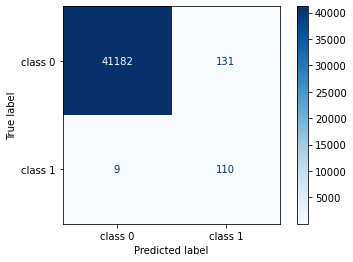

In [35]:
#performance results
print(classification_report(y_test, y_pred1, target_names=target_names))
plot_confusion_matrix(model1, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

  ## Over-sampling with SMOTE

In [36]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit on the trainning dataset
X_smote , y_smote = smote.fit_resample(df_X_train_stand, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_smote))

Original dataset shape: Counter({0: 165213, 1: 512})
Resample dataset shape: Counter({0: 165213, 1: 165213})


 ### b) Logistic Regression with Synthetic minority over-sampling technique (LR+SMOTE)

In [37]:
#Run grid search only on training set using cross-validation
start=perf_counter()
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model2=RandomizedSearchCV(LogisticRegression(solver='saga' ,max_iter=1000),parameters,cv=5, 
                          n_jobs=-1, scoring='roc_auc', verbose=3)
model2.fit(X_smote,y_smote)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.23 hrs.


In [38]:
print("tuned hpyerparameters :(best parameters) ",model2.best_params_)
print("Performance :",model2.best_score_)
print('Best Model:',model2.best_estimator_)

tuned hpyerparameters :(best parameters)  {'penalty': 'l2', 'C': 1000.0}
Performance : 0.9998989233699582
Best Model: LogisticRegression(C=1000.0, max_iter=1000, solver='saga')


In [39]:
y_pred2=model2.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     41313
     class 1       0.48      0.92      0.63       119

    accuracy                           1.00     41432
   macro avg       0.74      0.96      0.81     41432
weighted avg       1.00      1.00      1.00     41432



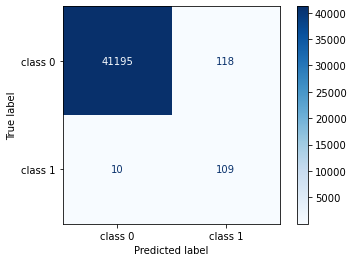

In [40]:
#performance results
print(classification_report(y_test, y_pred2, target_names=target_names))
plot_confusion_matrix(model2, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues); 

### c) Weighted Decision Tree (W-DT)

In [41]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters = {'criterion':['gini','entropy'], 'max_depth' : np.arange(1, 20)}
model3 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters, cv=5, n_jobs=-1, verbose=3)
# fit on the trainning dataset
model3.fit(df_X_train_stand, y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 38 candidates, totalling 190 fits
Elapsed time: 0.00 hrs.


In [42]:
print("tuned hpyerparameters :(best parameters) ",model3.best_params_)
print("accuracy :",model3.best_score_)
print('Best Model:',model3.best_estimator_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16}
accuracy : 0.9998612158696636
Best Model: DecisionTreeClassifier(class_weight='balanced', max_depth=16)


In [43]:
y_pred3 = model3.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     41313
     class 1       0.97      0.93      0.95       119

    accuracy                           1.00     41432
   macro avg       0.99      0.97      0.98     41432
weighted avg       1.00      1.00      1.00     41432



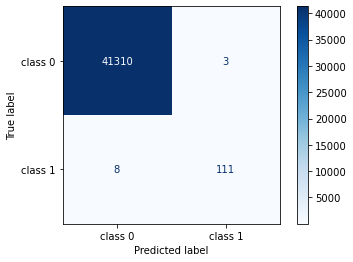

In [44]:
#performance results
print(classification_report(y_test, y_pred3, target_names=target_names))
plot_confusion_matrix(model3, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

## Undersampling using OSS
OneSidedSelection (OSS) is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule. 

In [45]:
# Import library
from imblearn.under_sampling import OneSidedSelection

In [46]:
# define the undersampling method
oss = OneSidedSelection(random_state=0, n_jobs=-1)
start=perf_counter()
# fit on the trainning dataset
X_oss, y_oss = oss.fit_resample(df_X_train_stand, y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)
# summarize the new class distribution
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_oss))

Elapsed time: 0.00 hrs.
Original dataset shape: Counter({0: 165213, 1: 512})
Resample dataset shape: Counter({0: 35451, 1: 512})


### d) Weighted Support Vector Machine with One Sided Selection (SVM+OSS)

In [47]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters = {'C':np.arange(1, 20)}
model4 = GridSearchCV(SVC(class_weight='balanced', kernel='rbf'), parameters, cv=5,n_jobs=-1, verbose=3)
model4.fit(X_oss, y_oss)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Elapsed time: 0.01 hrs.


In [48]:
print("tuned hpyerparameters :(best parameters) ",model4.best_params_)
print("accuracy :",model4.best_score_)
print('Best Model:',model4.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 19}
accuracy : 0.9984984590598913
Best Model: SVC(C=19, class_weight='balanced')


In [49]:
y_pred4 = model4.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     41313
     class 1       0.91      0.87      0.89       119

    accuracy                           1.00     41432
   macro avg       0.96      0.93      0.94     41432
weighted avg       1.00      1.00      1.00     41432



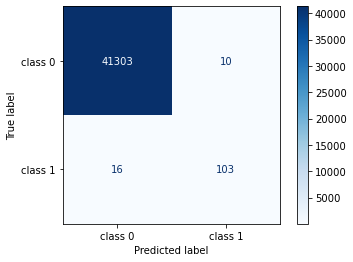

In [50]:
#performance results
print(classification_report(y_test, y_pred4, target_names=target_names))
plot_confusion_matrix(model4, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

### e)  XG Boost, Extreme Gradient Boosting (XGB)

In [51]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters = {'max_depth': np.arange (2, 10),'n_estimators': np.arange(60, 220, 40), 
              'learning_rate': [0.1, 0.01, 0.05],'gamma' : [0.1, 1, 1.5], 
              'subsample' : [0.8, 0.9, 1.0],
             'colsample_bytree' : [0.3, 0.5, 1.0]}
model5 = RandomizedSearchCV(XGBClassifier(eval_metric='logloss', use_label_encoder=False),
                            parameters, cv=5, n_jobs=-1,scoring='roc_auc',verbose=3)
model5.fit(df_X_train_stand, y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.02 hrs.


In [52]:
print("tuned hpyerparameters :(best parameters) ",model5.best_params_)
print("roc_auc :",model5.best_score_)
print('Best Model:',model5.best_estimator_)

tuned hpyerparameters :(best parameters)  {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.3}
roc_auc : 0.9999949618107642
Best Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='logloss', gamma=0.1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=32, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [53]:
y_pred5 = model5.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     41313
     class 1       1.00      0.90      0.95       119

    accuracy                           1.00     41432
   macro avg       1.00      0.95      0.97     41432
weighted avg       1.00      1.00      1.00     41432



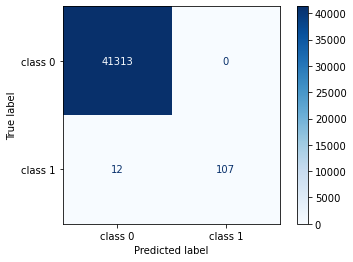

In [54]:
#performance results
print(classification_report(y_test, y_pred5, target_names=target_names))
plot_confusion_matrix(model5, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

In [55]:
#save notebook session
import dill
dill.dump_session('session_esc-12.db')
#to restore a notebook session
#dill.load_session('session_esc-12.db')